In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix;

# Feature engineering

##Carga del dataset y primer vistazo

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def load_DORMICION_data():
    csv_path = "/content/drive/MyDrive/PROYECTO_FINAL/Sleep_health_and_lifestyle_dataset.csv"#trayectoria completa del fichero
    print("leyendo:",csv_path)
    return pd.read_csv(csv_path)

In [ ]:
data = load_DORMICION_data()
data.head()

leyendo: /content/drive/MyDrive/PROYECTO_FINAL/Sleep_health_and_lifestyle_dataset.csv


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
# Obtener la cantidad de filas y columnas
filas, columnas = data.shape

# Imprimir la cantidad de datos
print("Cantidad de filas:", filas)
print("Cantidad de columnas:", columnas)

Cantidad de filas: 374
Cantidad de columnas: 13


### Vemos que nuestra columna a predecir está bastante balanceada

In [ ]:
data.value_counts("Sleep Disorder")

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
dtype: int64

##Visualización del tipo de columnas
Tenemos la mayoria como número y algunas (Gender, Occupation, BMI Category,
 Blood Pressure y Sleep Disorder como str)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
# Obtener el resumen estadístico de los datos
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


In [ ]:
# Contar los valores nulos en cada columna
nulos_por_columna = data.isnull().sum()


print(nulos_por_columna)

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


## Observando los valores que contiene cada columna

In [ ]:
# Obtener los valores únicos de una columna específica
Género = data['Gender'].unique()

print(Género)

['Male' 'Female']


In [ ]:
# Obtener los valores únicos de una columna específica
Ocupacion = data['Occupation'].unique()

print(Ocupacion)

['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


In [ ]:
# Obtener los valores únicos de una columna específica
BMI = data['BMI Category'].unique()

print(BMI)

['Overweight' 'Normal' 'Obese' 'Normal Weight']


En BMI vemos que hay dos varibales iguales entonces las unimos

In [ ]:
data['BMI Category'] = data['BMI Category'].apply(lambda x: 'Normal Weight' if x in ['Normal', 'Normal Weight'] else x)
# Obtener los valores únicos de una columna específica
BMI = data['BMI Category'].unique()

print(BMI)

['Overweight' 'Normal Weight' 'Obese']


In [ ]:
# Obtener los valores únicos de una columna específica
Desorden_del_sueño = data['Sleep Disorder'].unique()

# Imprimir los valores únicos
print(Desorden_del_sueño)

['None' 'Sleep Apnea' 'Insomnia']


In [ ]:
# Obtener los valores únicos de una columna específica
Presión_sanguinea = data['Blood Pressure'].unique()

# Imprimir los valores únicos
print(Presión_sanguinea)

['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']


In [ ]:
data[['Presión Sistólica', 'Presión Diastólica']] = data['Blood Pressure'].str.split('/', expand=True).astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
 13  Presión Sistólica        374 non-null    float64
 14  Presión Diastólica       3

## Distribución de las variables
En la distribución vemos como se reparten los valores de cada variable, los hombres y las mujeres están igualados, las personas de mediana edad son la mayoría, tambien vemos que hay más gente de algunos puestos de trabajo, que en la calidad del sueño los valores 4 y 5 están muy poco representados y más cosas que tendremos en cuenta más adelante

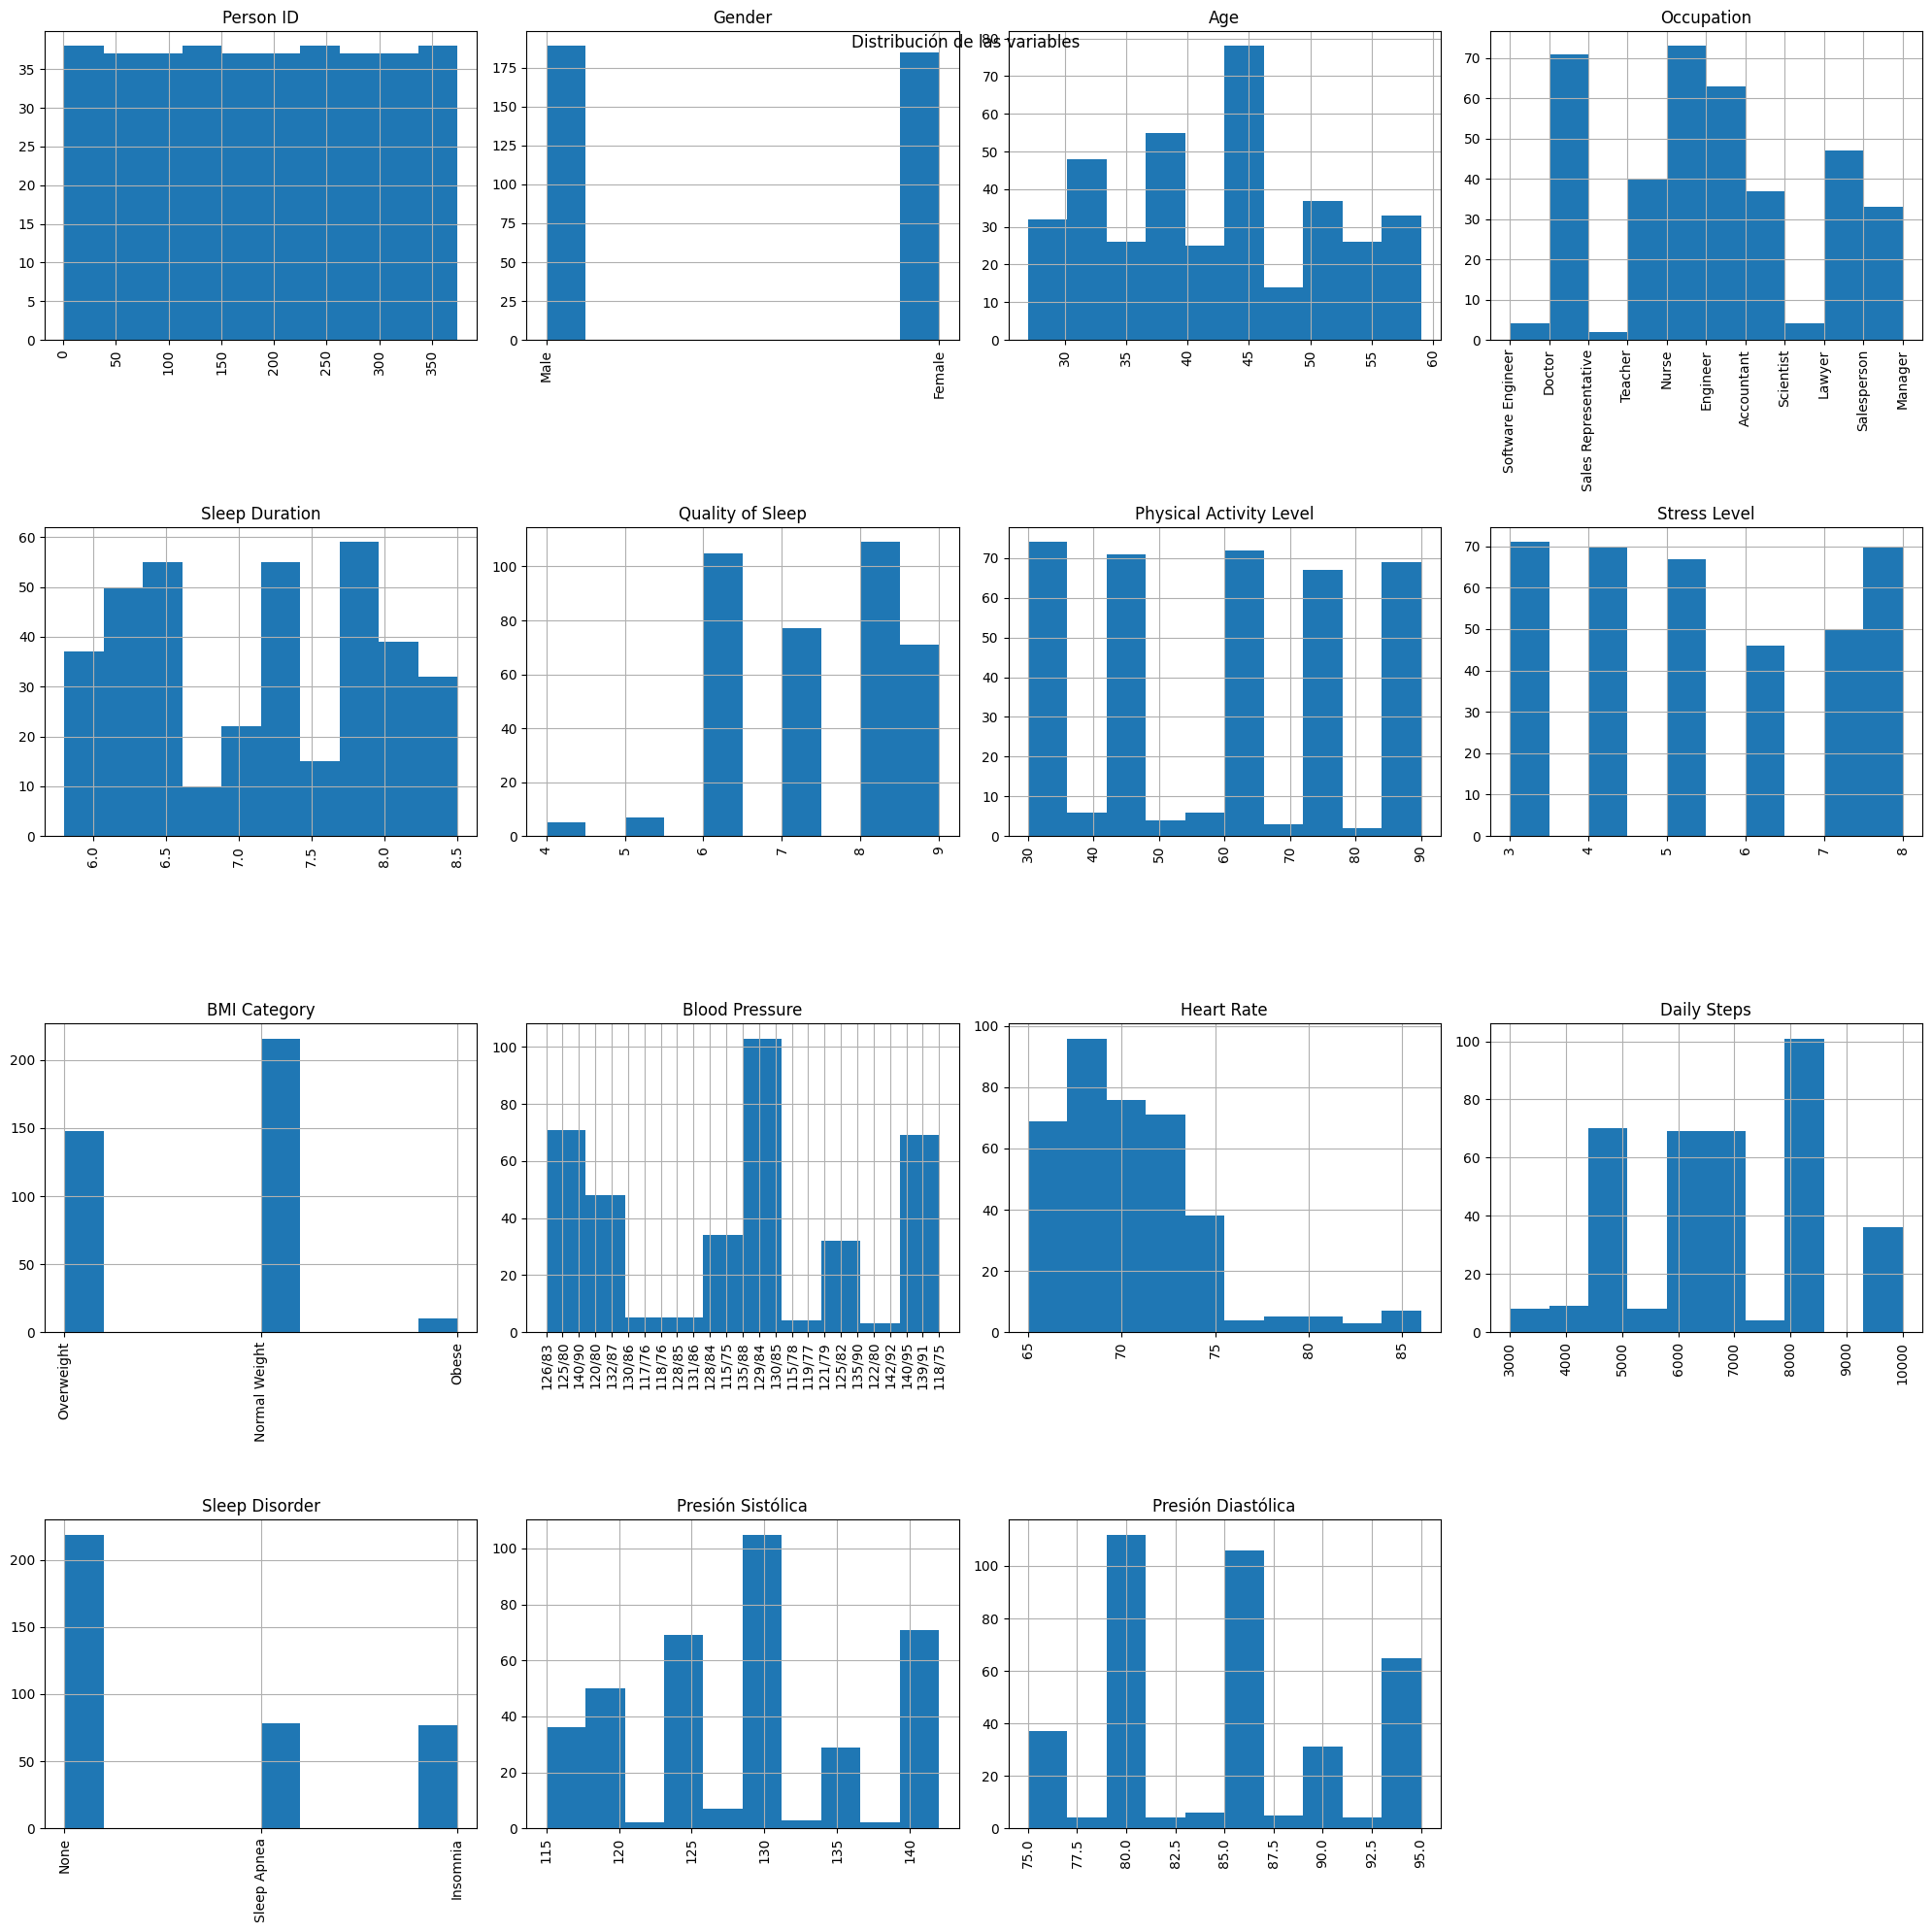

In [ ]:
plt.figure(figsize=(20, 20))
num_plots = len(data.columns)
rows = 4  # Número de filas en la matriz de subplots
cols = 4  # Número de columnas en la matriz de subplots

for i, column in enumerate(data.columns):
    plt.subplot(rows, cols, i+1)
    data[column].hist()
    plt.title(column)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.suptitle("Distribución de las variables")
plt.show()

#Distribución de algunos datos
En la edad por género observamos que hay más mujeres mayores que hombres

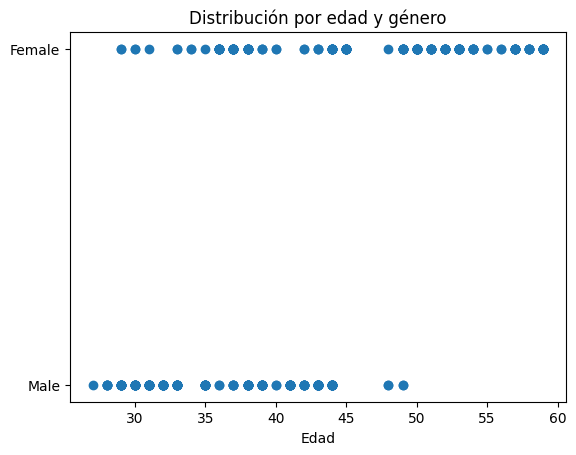

In [ ]:
# Crear un histograma de la edad
plt.scatter(data['Age'], data['Gender'])

# Agregar etiquetas y título
plt.xlabel('Edad')
plt.title('Distribución por edad y género')

# Mostrar el gráfico
plt.show()

## Estudio de correlaciones
Vamos a hacer una gráfica de todas las correlaciones de las columnas y dividiendolo por Género y podemos intuir las primeras correlaciones que después verificaremos con la matriz de correlación, por ejemplo entre las horas de sueño y la calidad o entre el heart rate y el BMI o en los clusteres de edades.

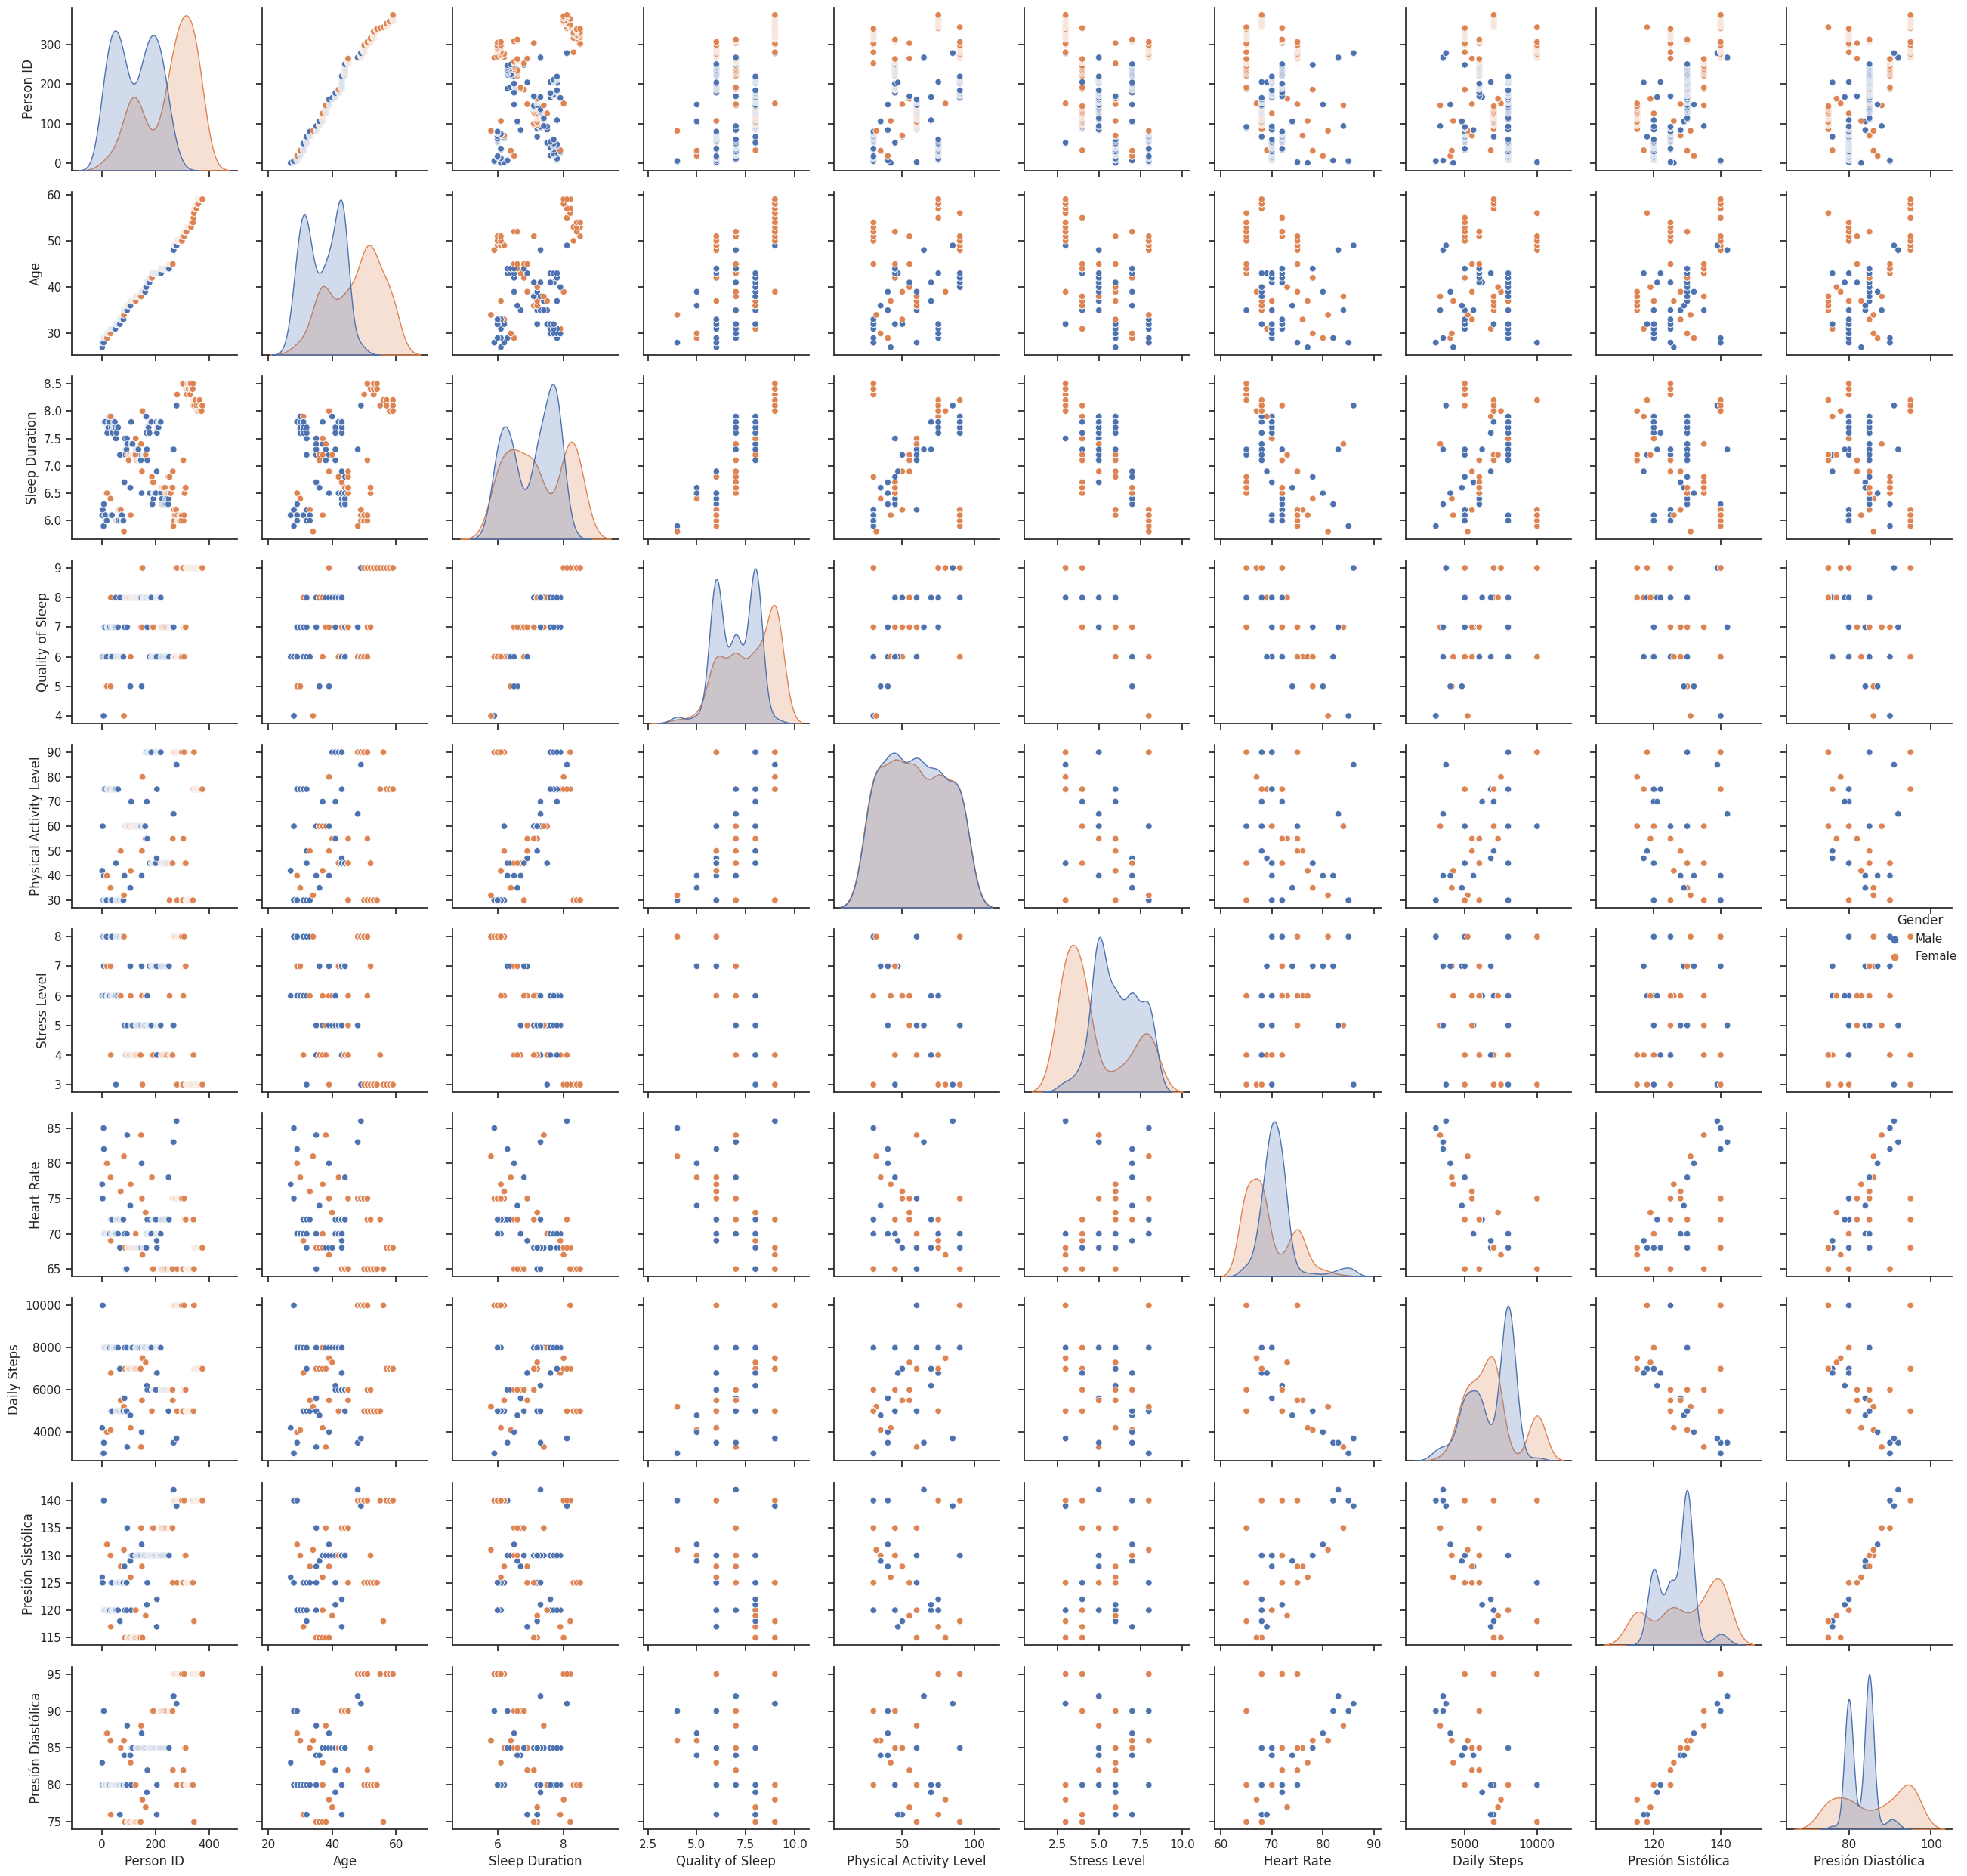

In [ ]:
# Crear la matriz de gráficos de dispersión
sns.set(style='ticks')
sns.pairplot(data, diag_kind='kde',hue='Gender')

# Ajustar el espaciado
plt.tight_layout()

# Mostrar los gráficos
plt.show()

##Ahora veremos las correlaciones con un heatmap y la matriz de correlación
Vemos las correlaciones en la  sleep duration y la calidad entre los pasos diarios y la actividad física, entre el heart rate y el stress y también entre la edad y la calidad del sueño ahora vamos a ver estas primeras correlaciones gráficamente.

<ipython-input-20-5e482fae2ddc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Presión Sistólica,Presión Diastólica
Person ID,1.000000,0.990516,0.296305,0.431612,0.149882,-0.394287,-0.225467,0.043844,0.611551,0.590670
Age,0.990516,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973,0.605878,0.593839
Sleep Duration,0.296305,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533,-0.180406,-0.166570
Quality of Sleep,0.431612,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791,-0.121632,-0.110151
Physical Activity Level,0.149882,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723,0.265416,0.382651
Stress Level,-0.394287,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829,0.102818,0.091811
Heart Rate,-0.225467,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309,0.294143,0.271092
Daily Steps,0.043844,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000,0.103342,0.241986
Presión Sistólica,0.611551,0.605878,-0.180406,-0.121632,0.265416,0.102818,0.294143,0.103342,1.000000,0.972885
Presión Diastólica,0.590670,0.593839,-0.166570,-0.110151,0.382651,0.091811,0.271092,0.241986,0.972885,1.000000


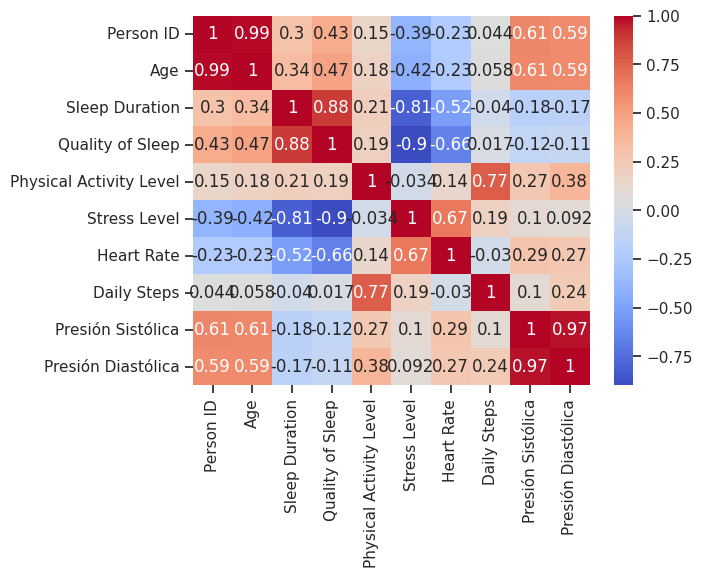

In [ ]:
# Calcular la matriz de correlación

correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
correlation_matrix

Observamos que esta correlación tiene todo el sentido porque cuanto mas duerme la gente más calidad del sueño tiene por lo general

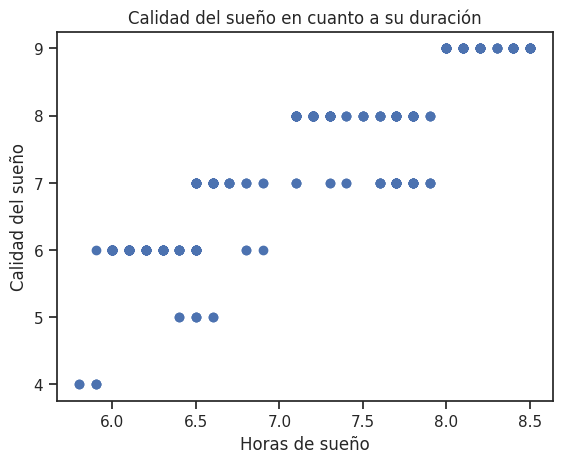

In [ ]:
# Crear el scatter plot
duración = data['Sleep Duration']
calidad = data['Quality of Sleep']

plt.scatter(duración, calidad)

# Configurar el estilo y las etiquetas
plt.xlabel('Horas de sueño')
plt.ylabel('Calidad del sueño')
plt.title('Calidad del sueño en cuanto a su duración')

# Mostrar el gráfico
plt.show()

Por lo general cuantos más pasos diarios más actividad física

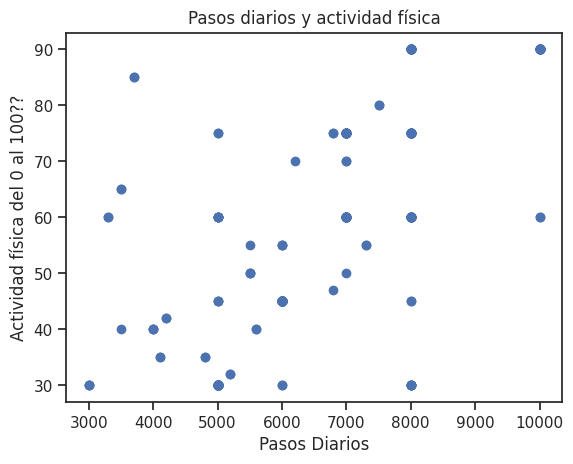

In [ ]:
# Crear el scatter plot
pasos = data['Daily Steps']
física = data['Physical Activity Level']

plt.scatter(pasos, física)

# Configurar el estilo y las etiquetas
plt.xlabel('Pasos Diarios')
plt.ylabel('Actividad física del 0 al 100??')
plt.title('Pasos diarios y actividad física')

# Mostrar el gráfico
plt.show()

Cuantas más pulsaciones más estrés

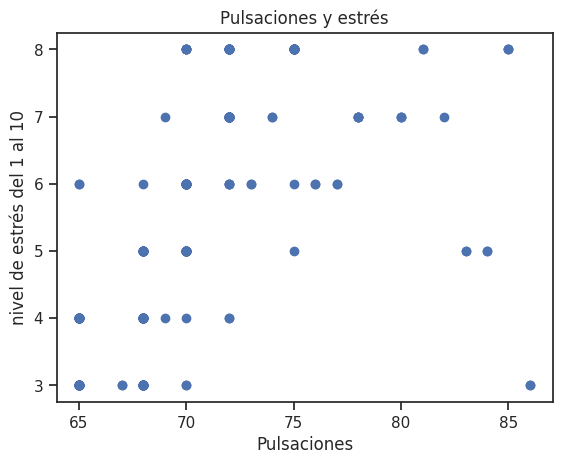

In [ ]:
# Crear el scatter plot
cora = data['Heart Rate']
estrés = data['Stress Level']

plt.scatter(cora, estrés)

# Configurar el estilo y las etiquetas
plt.xlabel('Pulsaciones')
plt.ylabel('nivel de estrés del 1 al 10')
plt.title('Pulsaciones y estrés')

# Mostrar el gráfico
plt.show()

Parace que va bastante correlacionado la edad y la calidad como por clusteres de rangos de edad

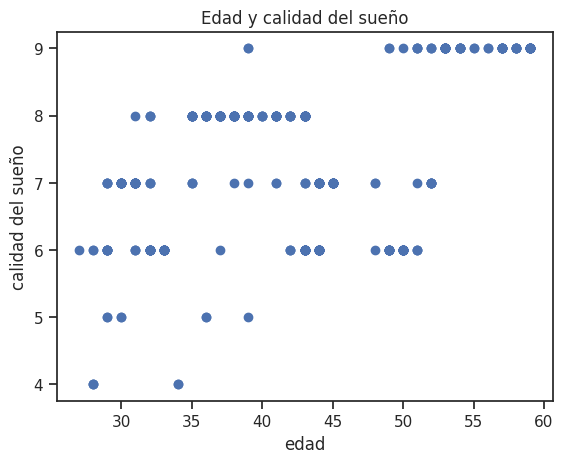

In [ ]:
# Crear el scatter plot
edad = data['Age']
calidad = data['Quality of Sleep']

plt.scatter(edad, calidad)

# Configurar el estilo y las etiquetas
plt.xlabel('edad')
plt.ylabel('calidad del sueño')
plt.title('Edad y calidad del sueño')

# Mostrar el gráfico
plt.show()

#Resultados
La actividad física tiene outliers en arriba izda,
Cuando las pulsaciones aumentan la duracion del sueño desciende


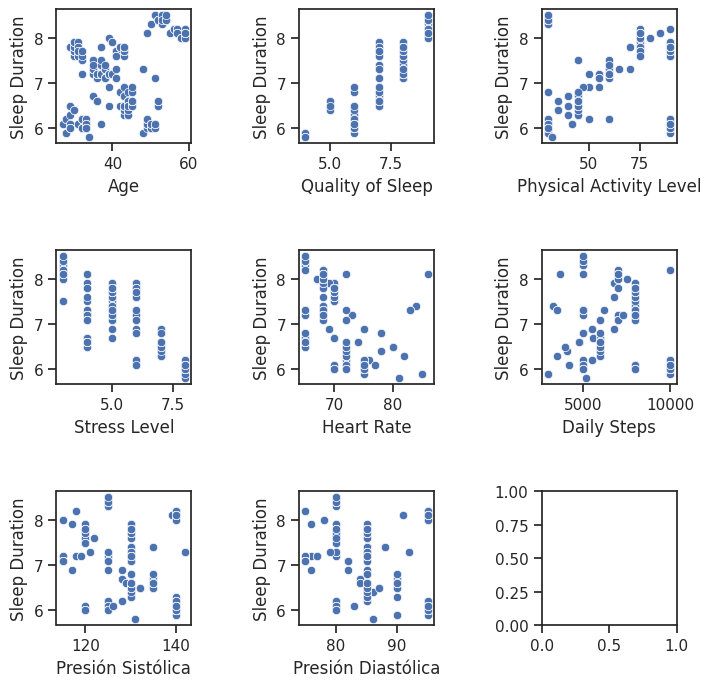

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
plt.subplots_adjust(wspace=0.8, hspace=0.8)

numeric_x = ["Age", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps", "Presión Sistólica", "Presión Diastólica"]

for i, cat in enumerate(numeric_x):
    sns.scatterplot(x = cat, y= "Sleep Duration",data=data, ax=axs[int(i/3), i%3])

plt.show()

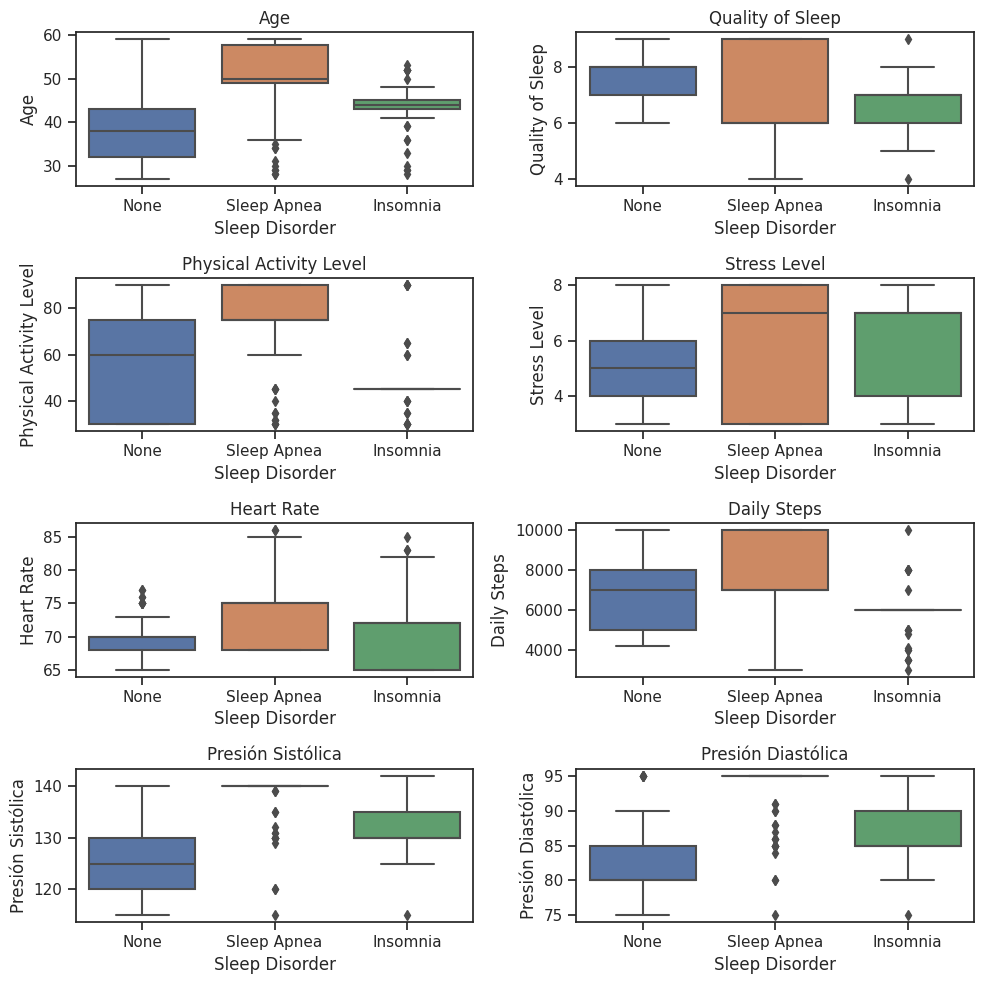

In [ ]:
# Create a grid of plots
fig, axs = plt.subplots(4, 2, figsize=(10, 10))
plt.subplots_adjust(wspace=0.8, hspace=0.8)

# Iterate over pairs of parameters

for i, ax in enumerate(axs.flat):
    sns.boxplot(x='Sleep Disorder', y=numeric_x[i], data=data, ax=ax).set_title(numeric_x[i])

plt.tight_layout()
plt.show()

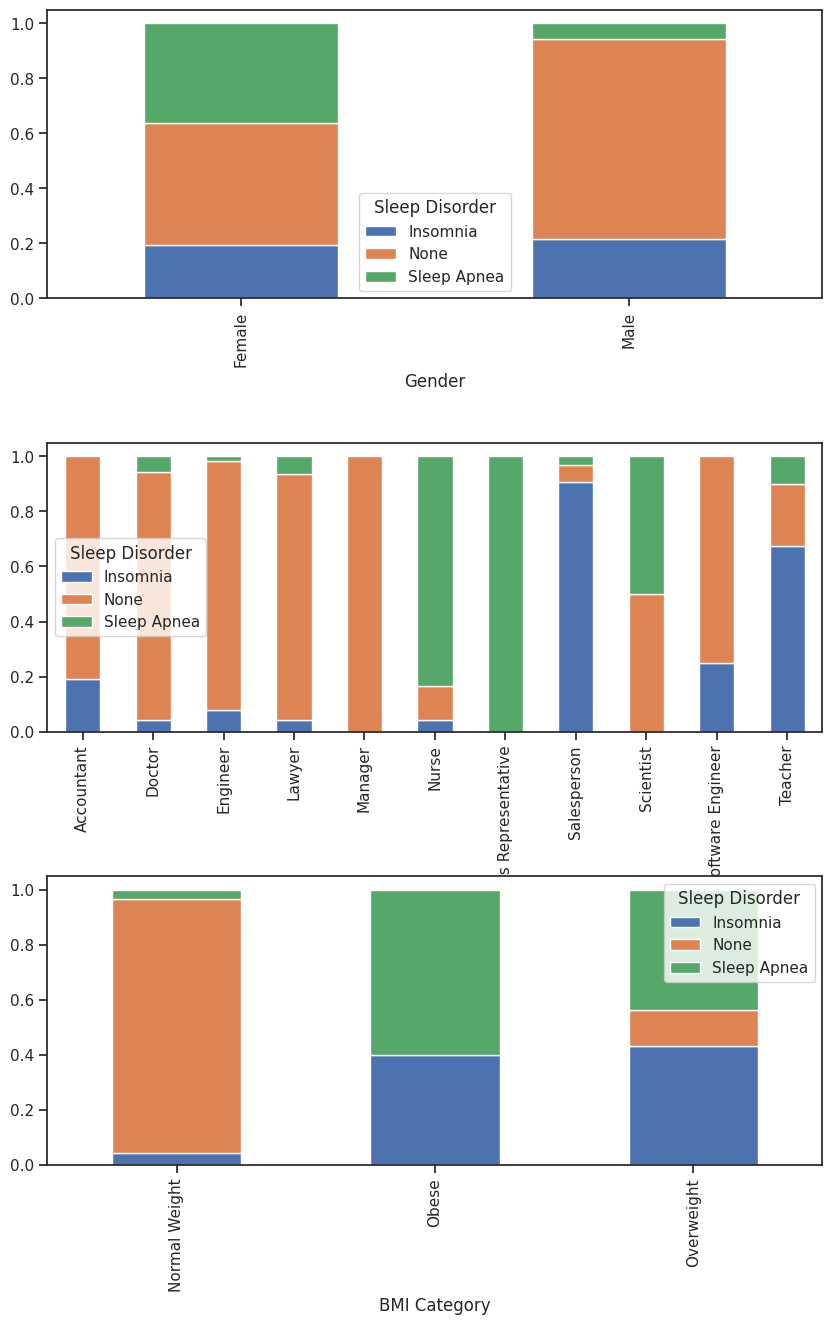

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

categorical_x = ["Gender", "Occupation", "BMI Category"]

for i,cat in enumerate(categorical_x):

    counts = (data.groupby([cat])['Sleep Disorder']
                      .value_counts(normalize=True)
                      .unstack())

    counts.plot(kind='bar', stacked=True, ax=axs[i])


#Desorden del sueño
Los desordenes del sueño vemos como se ubican según cada variable, podemos ver que la apnea en nuestro dataset es mas común en mujeres y sobretodo enfermeras y hombres de negocio y profesores insomnio y sobretodo por sobrepeso

## Valoración de reducción de dimensionalidad.
No haremos ninguna reducción de dimensionalidad porque hay 13 columnas y son bastante importantes para el dataset todas

## Función de tranformación del Dataset y balanceo de los datos

In [ ]:
def limpiado(csv_path,id_colum,columnas_one_hot,columnas_float,columnas_union):
  drive.mount('/content/drive')
  print("leyendo:",csv_path)
  data = pd.read_csv(csv_path)
  mapeo = {'None': 1, 'Sleep Apnea': 2, 'Insomnia': 0}
  data['Sleep Disorder'] = data['Sleep Disorder'].map(mapeo)
  data[columnas_union] = data[columnas_union].apply(lambda x: 'Normal Weight' if x in ['Normal', 'Normal Weight'] else x)
  data = pd.get_dummies(data, columns=columnas_one_hot)
  data[['Presión Sistólica', 'Presión Diastólica']] = data[columnas_float].str.split('/', expand=True).astype(float)
  data = data.drop(columns=columnas_float, axis=1)
  data.set_index(id_colum, inplace=True)
  return data

In [ ]:
ruta = "/content/drive/MyDrive/PROYECTO_FINAL/Sleep_health_and_lifestyle_dataset.csv"
columnas_one_hot = ["BMI Category","Occupation","Gender"]
columnas_float = "Blood Pressure"
columnas_union = "BMI Category"
id_colum = "Person ID"
data = limpiado(ruta,id_colum,columnas_one_hot, columnas_float,columnas_union)
data.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
leyendo: /content/drive/MyDrive/PROYECTO_FINAL/Sleep_health_and_lifestyle_dataset.csv
<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 1 to 374
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              374 non-null    int64  
 1   Sleep Duration                   374 non-null    float64
 2   Quality of Sleep                 374 non-null    int64  
 3   Physical Activity Level          374 non-null    int64  
 4   Stress Level                     374 non-null    int64  
 5   Heart Rate                       374 non-null    int64  
 6   Daily Steps                      374 non-null    int64  
 7   Sleep Disorder                   374 non-null    int64  
 8   BMI Category_Normal Weight       374 non-null    uint8 

# Entrenamiento del modelo

## Dividimos en Train y Test

In [ ]:
X_train, X_test = train_test_split(data, test_size=0.30) #cogemos el 30 por ciento para testear
len(X_train), len(X_test)

y_train = X_train["Sleep Disorder"].copy()
X_train = X_train.drop("Sleep Disorder", axis=1)

y_train.value_counts()

1    156
0     56
2     49
Name: Sleep Disorder, dtype: int64

## Entrenando y evaluando

#### Importamos las medidas de evaluación y el crosss val predict

In [ ]:
from sklearn.metrics import precision_score, recall_score;
from sklearn.metrics import roc_auc_score;
from sklearn.model_selection import cross_val_predict;
from sklearn.metrics import f1_score;

#### Implementamos los algoritmos más usados en clasificación y visualizamos sus medidas de rendimiento

* Cross Val Predict lo usaremos para generar predicciones utilizando validación cruzada, que nos proporciona una evaluación más precisa del rendimiento del modelo y reduce el riesgo de sobreajuste

* La precisión mide la capacidad del modelo para no etiquetar como positivo una muestra que es negativa. Precisión = VP / (VP + FP)

* La sensibilidad mide la proporción de verdaderos positivos sobre el total de muestras positivas. sensibilidad = VP / (VP +FN)

* F1 score mide el equilibrio entre la precisión y el recall

### Resultados del SVC

In [ ]:
from sklearn.svm import SVC

svc_clf = SVC(gamma="auto")
svc_clf.fit(X_train, y_train)

#Medidas
y_train_pred_svc = cross_val_predict(svc_clf, X_train, y_train, cv=5)
precision = precision_score(y_train, y_train_pred_svc, average=None)
recall = recall_score(y_train, y_train_pred_svc, average=None)
print("Precisión:","\t", np.round(precision,2), np.mean(precision));
print("Recall:","\t",    np.round(recall,   2), np.mean(recall));

Precisión: 	 [0.93 0.9  0.84] 0.8903078982597054
Recall: 	 [0.75 0.96 0.86] 0.8540903540903542


#### Tiene una buena precision y una sensibilidad aceptable

### Resultados del SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

#Medidas
y_train_pred_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv=5)
precision = precision_score(y_train, y_train_pred_sgd, average=None)
recall = recall_score(y_train, y_train_pred_sgd, average=None)
print("Precisión:","\t", np.round(precision,2), np.mean(precision));
print("Recall:","\t",    np.round(recall,   2), np.mean(recall));

Precisión: 	 [0.21 0.59 0.  ] 0.2687566670617518
Recall: 	 [0.45 0.54 0.  ] 0.3304334554334554


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Vemos que es pesimo prediciendo y en sensibilidad asique descartado

### Resultados del RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier;

# crea varios arboles de descion y escoge lo más frecuente o lo que mas se repite
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators es la cantidad de arboles que vamos a crear
forest_clf.fit(X_train, y_train)

#Medidas
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train, cv=5)
precision = precision_score(y_train, y_train_pred_forest, average=None)
recall = recall_score(y_train, y_train_pred_forest, average=None)
print("Precisión:","\t", np.round(precision,2), np.mean(precision));
print("Recall:","\t",    np.round(recall,   2), np.mean(recall));

Precisión: 	 [0.89 0.93 0.85] 0.8912910552061496
Recall: 	 [0.86 0.95 0.84] 0.8808651665794521


#### Tiene una buena precision y una buena sensibilidad

### XGBClassifier

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=500, random_state=42,learning_rate=0.01,colsample_bytree=0.5, booster="dart")
xgb_clf.fit(X_train, y_train)

# Realiza predicciones en el conjunto de entrenamiento utilizando validación cruzada
y_train_pred_xgb = cross_val_predict(xgb_clf, X_train, y_train, cv=5)
precision = precision_score(y_train, y_train_pred_xgb, average=None)
recall = recall_score(y_train, y_train_pred_xgb, average=None)
print("Precisión:\t", np.round(precision, 2), np.mean(precision))
print("Recall:\t\t", np.round(recall, 2), np.mean(recall))

Precisión:	 [0.91 0.95 0.84] 0.8992807394159041
Recall:		 [0.86 0.96 0.88] 0.8966073608930752


#### Tiene una buena precision y una buena sensibilidad

## Matriz de confusión
#### La usaremos para mostar la frecuencia con la que el modelo clasifica las instancias de cada clase en función de la verdadera clase de esas instancias.

In [ ]:
class_names = ["Imsomnio","None","Amnea"]

### Matriz de confusión del SVC

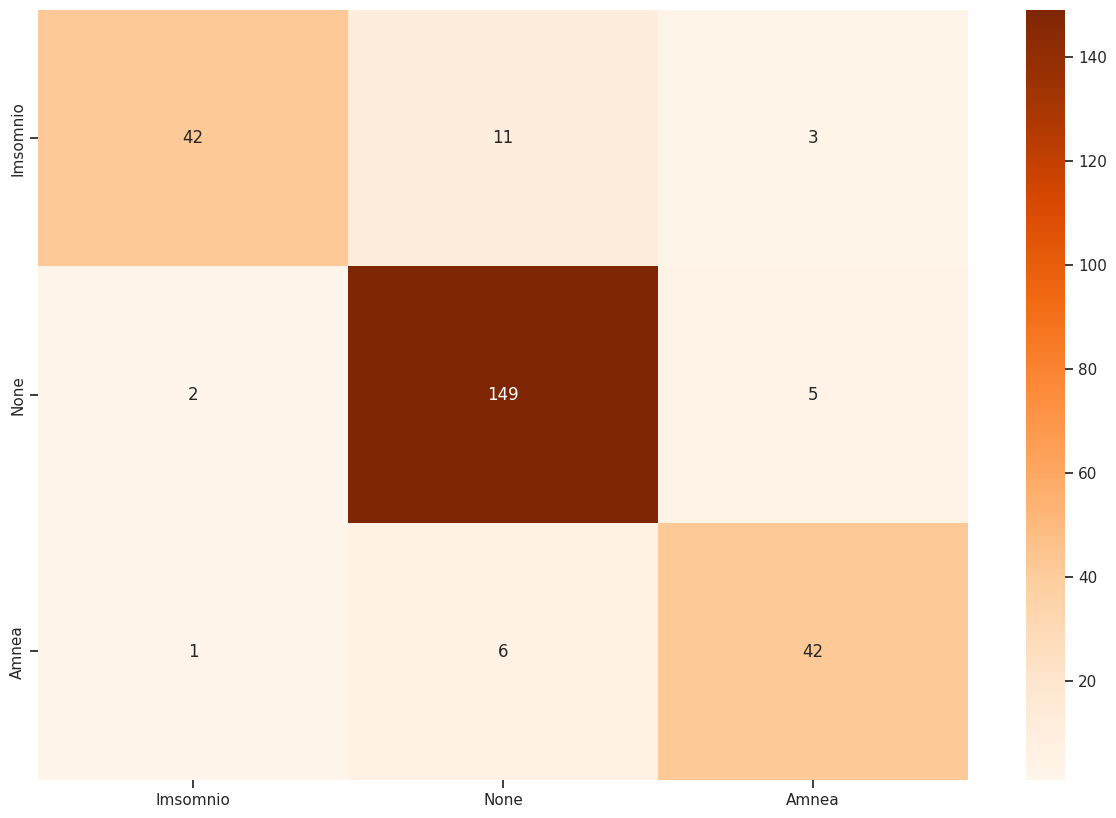

In [ ]:
cm = confusion_matrix(y_train, y_train_pred_svc)
cm
fig, ax = plt.subplots(figsize=(15,10));
sns.heatmap(cm, annot=True, cmap="Oranges", fmt="g", ax=ax, xticklabels=class_names, yticklabels=class_names);
plt.show();

### Matriz de confusión del forest

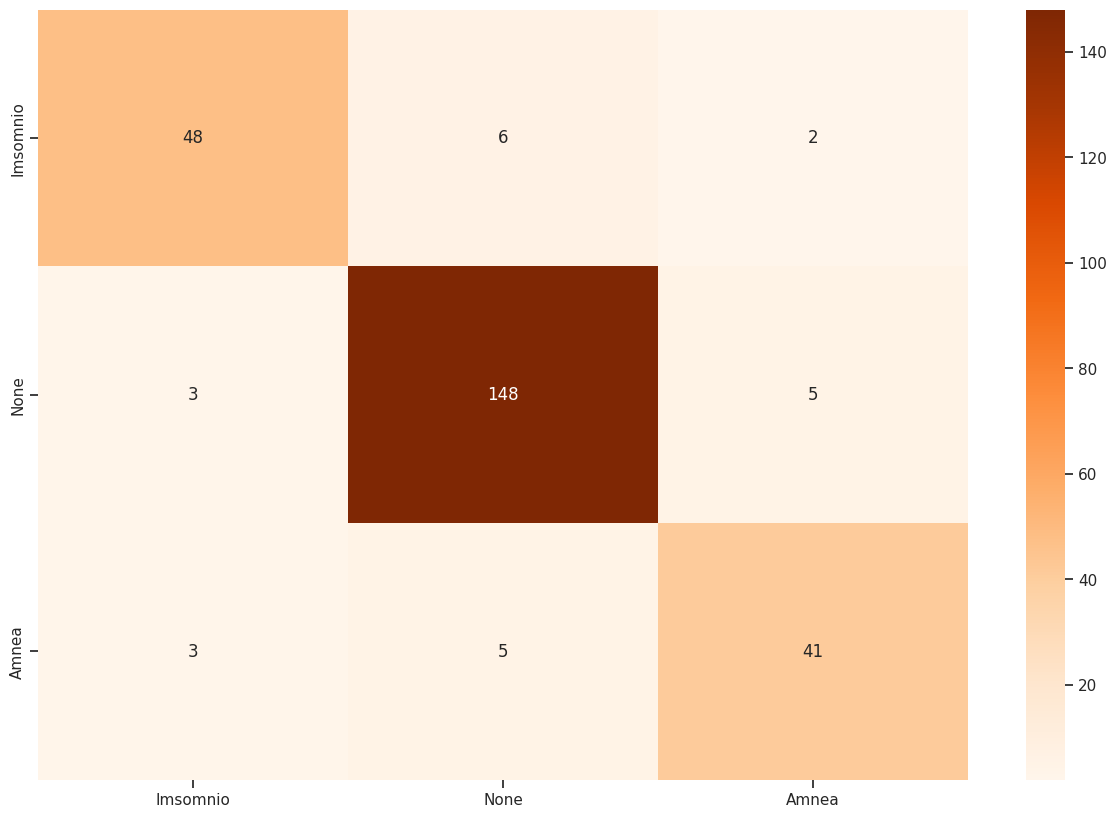

In [ ]:
cm = confusion_matrix(y_train, y_train_pred_forest)
cm
fig, ax = plt.subplots(figsize=(15,10));
sns.heatmap(cm, annot=True, cmap="Oranges", fmt="g", ax=ax, xticklabels=class_names, yticklabels=class_names);
plt.show();

### Matriz de confusión de XGBClassifier

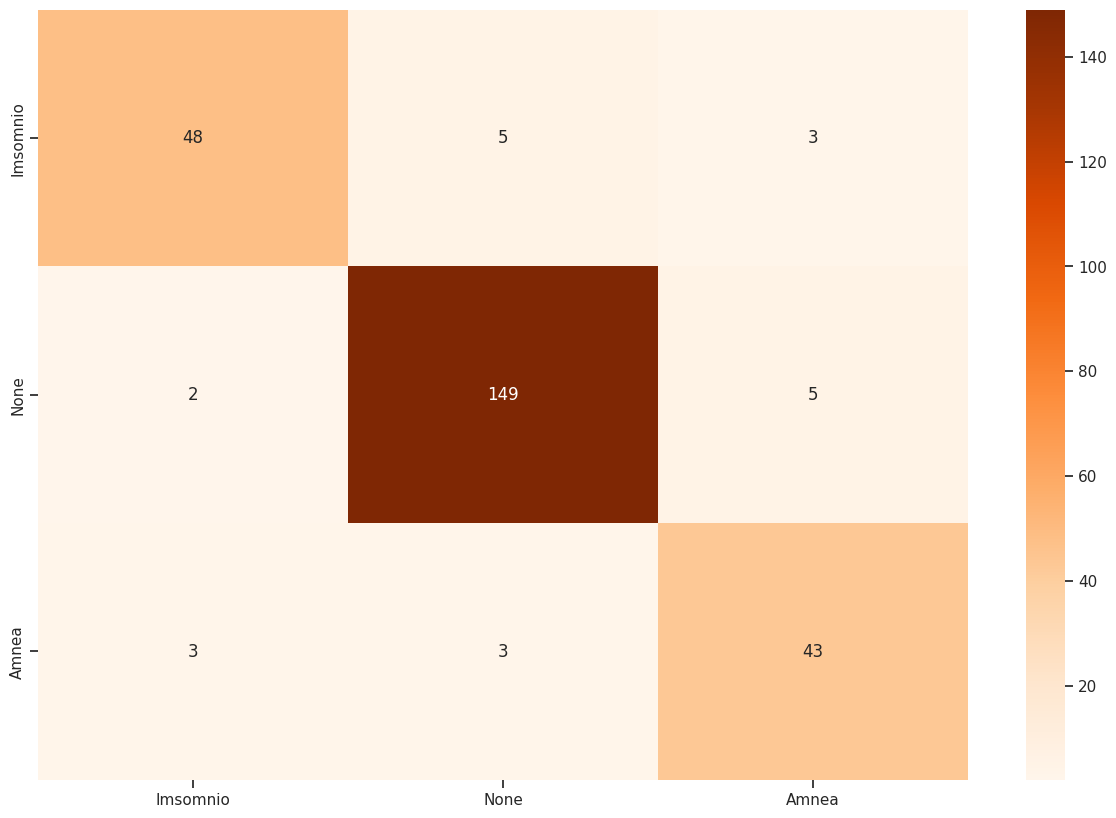

In [ ]:
cm = confusion_matrix(y_train, y_train_pred_xgb)
cm
fig, ax = plt.subplots(figsize=(15,10));
sns.heatmap(cm, annot=True, cmap="Oranges", fmt="g", ax=ax, xticklabels=class_names, yticklabels=class_names);
plt.show();

## Evaluando el modelo con el Test Set

In [ ]:
y_test = X_test["Sleep Disorder"].copy()
X_test = X_test.drop("Sleep Disorder", axis=1)

### Resultados del RandomForestClassifier

In [ ]:
y_test_pred_forest = forest_clf.predict(X_test)

precision = precision_score(y_test, y_test_pred_forest, average=None)
recall = recall_score(y_test, y_test_pred_forest, average=None)
f1 = f1_score(y_test, y_test_pred_forest, average=None)

print("Precisión:","\t", np.round(precision,2), np.mean(precision));
print("Recall:","\t",    np.round(recall,   2), np.mean(recall));
print("F1:","\t\t",      np.round(f1,       2), np.mean(f1));

Precisión: 	 [0.78 0.91 1.  ] 0.8976854856154013
Recall: 	 [0.86 0.97 0.79] 0.8728334245575624
F1: 		 [0.82 0.94 0.88] 0.8804195804195803


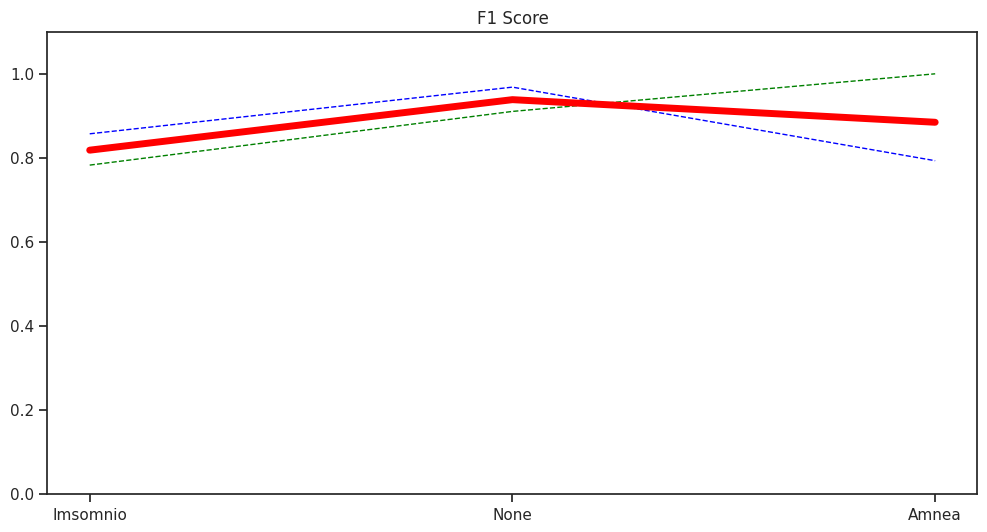

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=class_names, y=precision, linewidth=1.0, color="green", linestyle="--");
ax = sns.lineplot(x=class_names, y=recall,    linewidth=1.0, color="blue",  linestyle="--");
ax = sns.lineplot(x=class_names, y=f1,        linewidth=5.0, color="red");
ax.set_title("F1 Score");
ax.set_ylim(0,1.1);
plt.show();

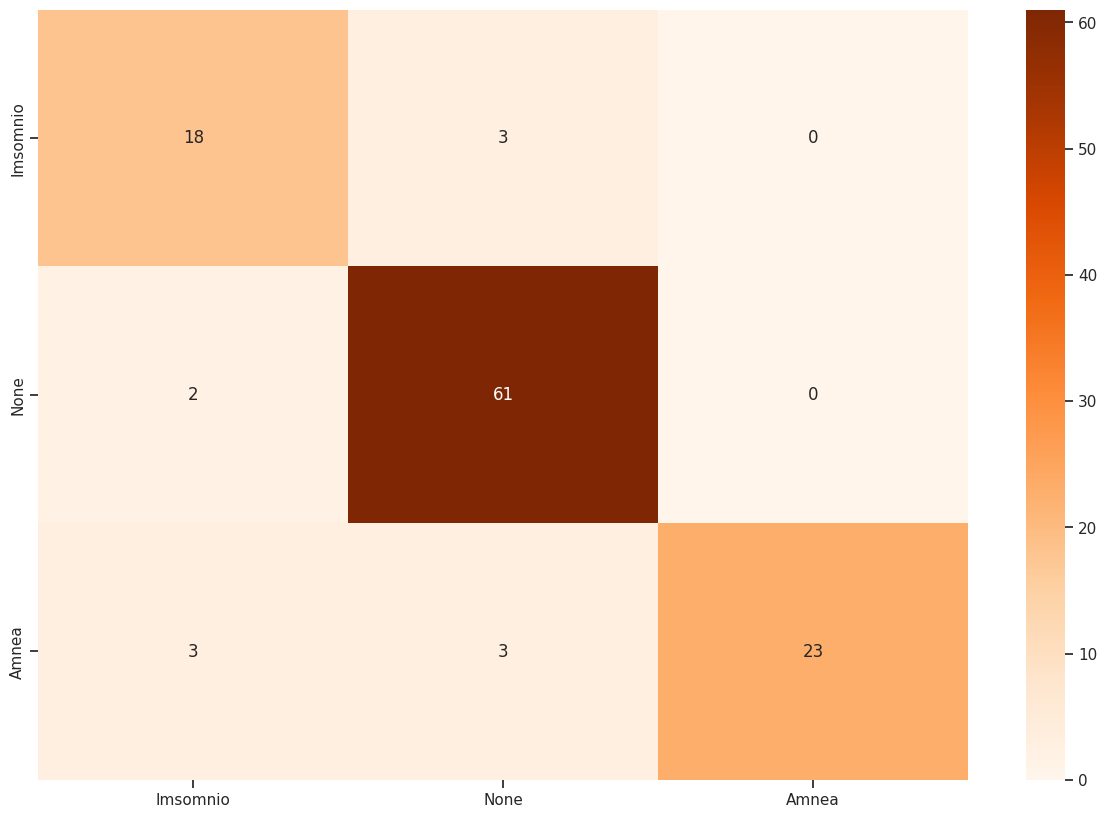

In [ ]:
cm = confusion_matrix(y_test, y_test_pred_forest)
cm
fig, ax = plt.subplots(figsize=(15,10));
sns.heatmap(cm, annot=True, cmap="Oranges", fmt="g", ax=ax, xticklabels=class_names, yticklabels=class_names);
plt.show();

### Resultados del SVC

In [ ]:
y_test_pred_SVC = svc_clf.predict(X_test)

precision = precision_score(y_test, y_test_pred_SVC, average=None)
recall = recall_score(y_test, y_test_pred_SVC, average=None)
f1 = f1_score(y_test, y_test_pred_SVC, average=None)

print("Precisión:","\t", np.round(precision,2), np.mean(precision));
print("Recall:","\t",    np.round(recall,   2), np.mean(recall));
print("F1:","\t\t",      np.round(f1,       2), np.mean(f1));

Precisión: 	 [0.77 0.9  1.  ] 0.8899286987522282
Recall: 	 [0.81 0.97 0.79] 0.8569604086845466
F1: 		 [0.79 0.93 0.88] 0.8688702563192178


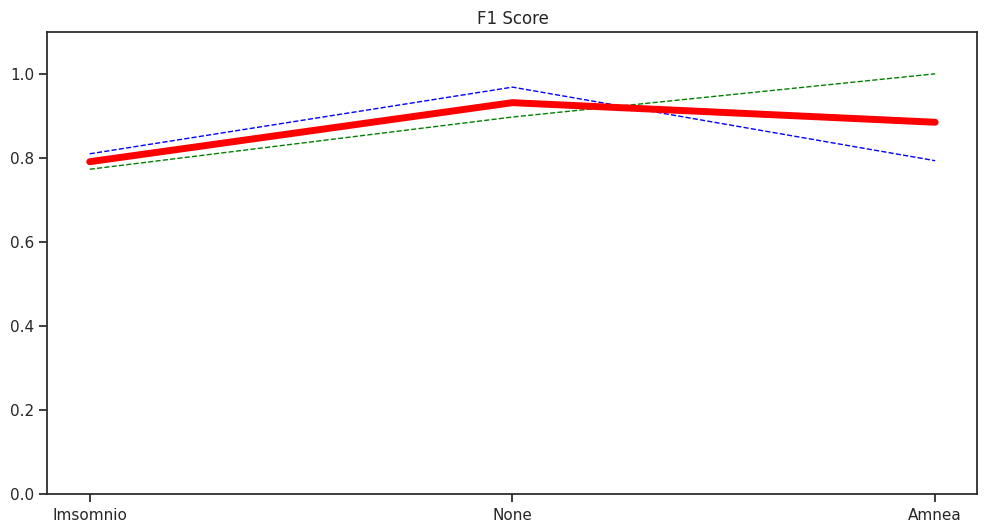

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=class_names, y=precision, linewidth=1.0, color="green", linestyle="--");
ax = sns.lineplot(x=class_names, y=recall,    linewidth=1.0, color="blue",  linestyle="--");
ax = sns.lineplot(x=class_names, y=f1,        linewidth=5.0, color="red");
ax.set_title("F1 Score");
ax.set_ylim(0,1.1);
plt.show();

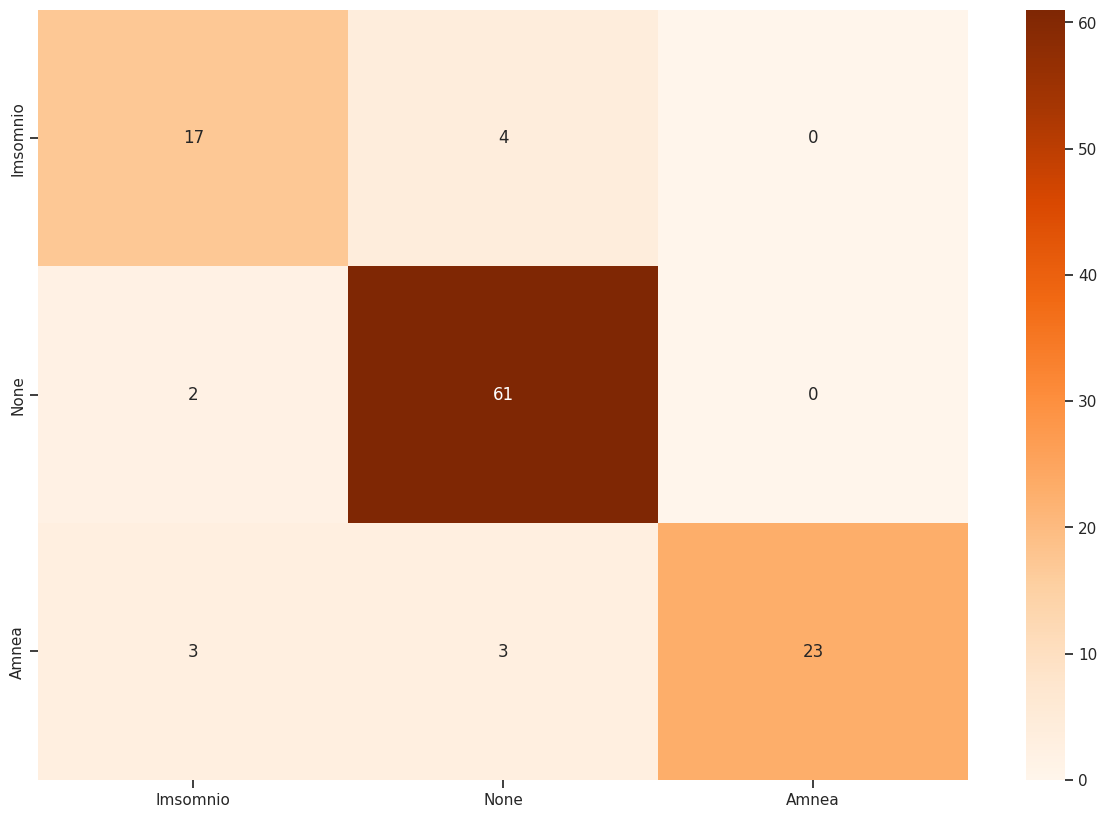

In [ ]:
cm = confusion_matrix(y_test, y_test_pred_SVC)
cm
fig, ax = plt.subplots(figsize=(15,10));
sns.heatmap(cm, annot=True, cmap="Oranges", fmt="g", ax=ax, xticklabels=class_names, yticklabels=class_names);
plt.show();

### Resultados del XGBClassifier

In [ ]:
y_test_pred_XGB = xgb_clf.predict(X_test)

precision = precision_score(y_test, y_test_pred_XGB, average=None)
recall = recall_score(y_test, y_test_pred_XGB, average=None)
f1 = f1_score(y_test, y_test_pred_XGB, average=None)

print("Precisión:","\t", np.round(precision,2), np.mean(precision));
print("Recall:","\t",    np.round(recall,   2), np.mean(recall));
print("F1:","\t\t",      np.round(f1,       2), np.mean(f1));

Precisión: 	 [0.76 0.94 1.  ] 0.8994871794871795
Recall: 	 [0.9  0.97 0.79] 0.8887064404305783
F1: 		 [0.83 0.95 0.88] 0.8879424470457079


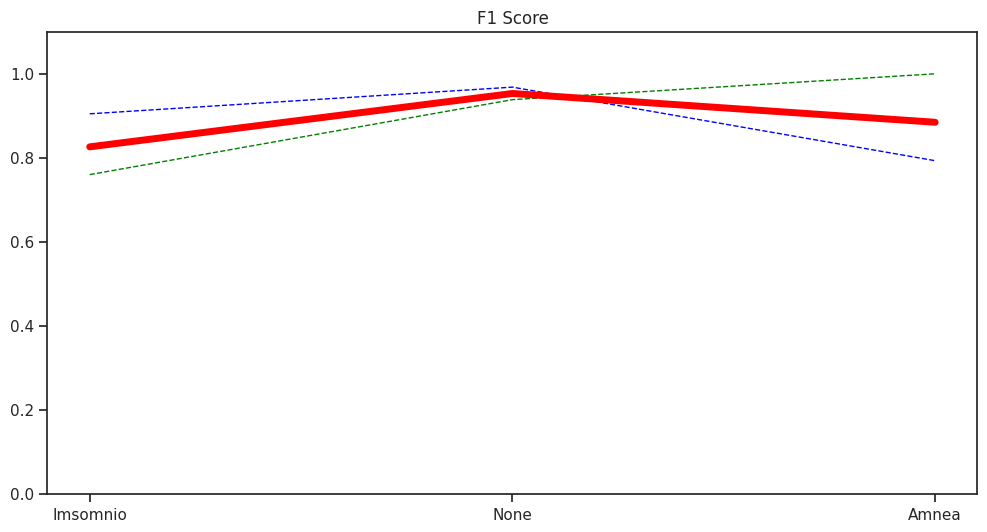

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=class_names, y=precision, linewidth=1.0, color="green", linestyle="--");
ax = sns.lineplot(x=class_names, y=recall,    linewidth=1.0, color="blue",  linestyle="--");
ax = sns.lineplot(x=class_names, y=f1,        linewidth=5.0, color="red");
ax.set_title("F1 Score");
ax.set_ylim(0,1.1);
plt.show();

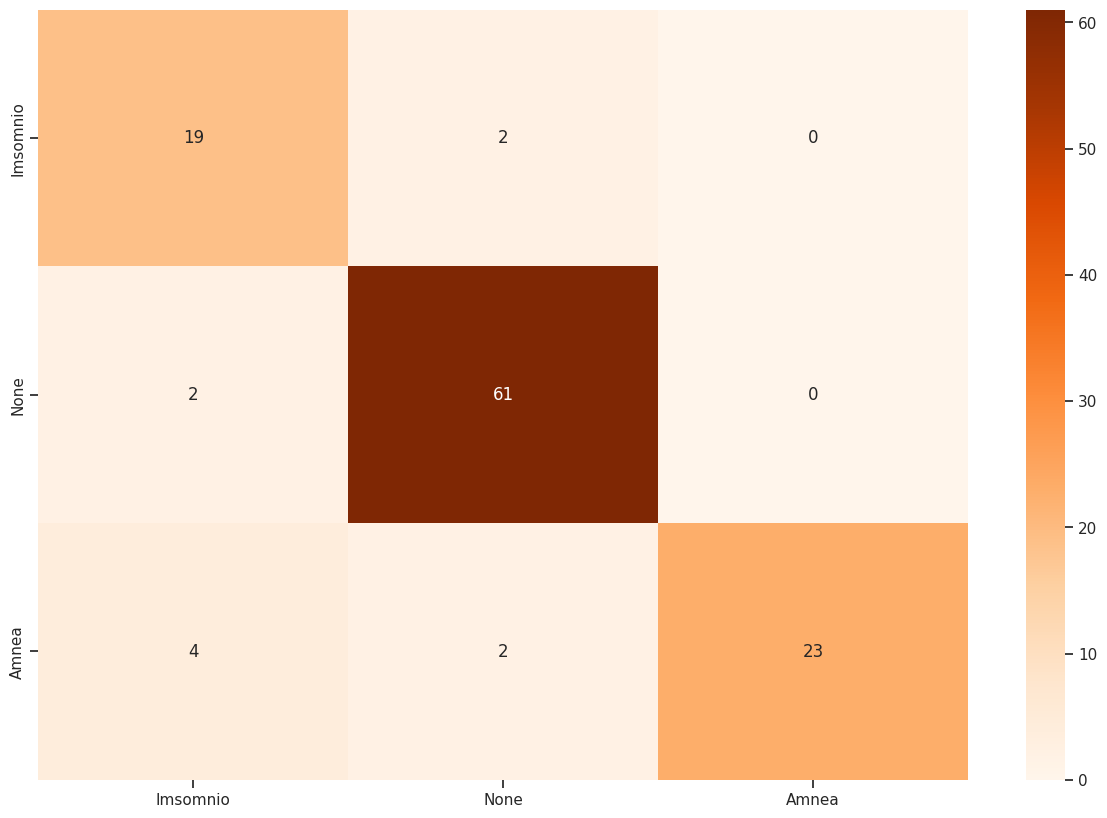

In [ ]:
cm = confusion_matrix(y_test, y_test_pred_XGB)
cm
fig, ax = plt.subplots(figsize=(15,10));
sns.heatmap(cm, annot=True, cmap="Oranges", fmt="g", ax=ax, xticklabels=class_names, yticklabels=class_names);
plt.show();

### Conclusión


#### Vemos que tanto el RandomForestClassifier como el XGBClassifier dan muy buenos resultados tanto en la predicción como en la sensibilidad y para las tres clases, asique nos quedaremos con el xgboost ya que es el más actual y el que menos tiende a sobreaprender

##Red Neuronal

In [4]:
import torch
import torch.nn as nn
import pickle

In [72]:
def limpiado(csv_path,id_colum,columnas_one_hot,columnas_float,columnas_union):
  drive.mount('/content/drive')
  print("leyendo:",csv_path)
  data = pd.read_csv(csv_path)
  mapeo = {'None': 1, 'Sleep Apnea': 2, 'Insomnia': 0}
  data['Sleep Disorder'] = data['Sleep Disorder'].map(mapeo)
  data[columnas_union] = data[columnas_union].apply(lambda x: 'Normal Weight' if x in ['Normal', 'Normal Weight'] else x)
  data = pd.get_dummies(data, columns=columnas_one_hot)
  data[['Presión Sistólica', 'Presión Diastólica']] = data[columnas_float].str.split('/', expand=True).astype(float)
  data = data.drop(columns=columnas_float, axis=1)
  data.set_index(id_colum, inplace=True)
  return data

In [73]:
ruta = "/content/drive/MyDrive/PROYECTO_FINAL/Entrega Final/Sleep_health_and_lifestyle_dataset.csv"
columnas_one_hot = ["BMI Category","Occupation","Gender"]
columnas_float = "Blood Pressure"
columnas_union = "BMI Category"
id_colum = "Person ID"
data = limpiado(ruta,id_colum,columnas_one_hot, columnas_float,columnas_union)
data.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
leyendo: /content/drive/MyDrive/PROYECTO_FINAL/Entrega Final/Sleep_health_and_lifestyle_dataset.csv
<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 1 to 374
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              374 non-null    int64  
 1   Sleep Duration                   374 non-null    float64
 2   Quality of Sleep                 374 non-null    int64  
 3   Physical Activity Level          374 non-null    int64  
 4   Stress Level                     374 non-null    int64  
 5   Heart Rate                       374 non-null    int64  
 6   Daily Steps                      374 non-null    int64  
 7   Sleep Disorder                   374 non-null    int64  
 8   BMI Category_Normal Weight       374 non-

Comprobamos que la columna sleep desorder efectivamente hizo el mapeo

In [74]:
# Obtener los valores únicos de una columna específica
Desorden_del_sueño = data['Sleep Disorder'].unique()

# Imprimir los valores únicos
print(Desorden_del_sueño)

[1 2 0]


Dividimos la data y la pasamos a tensores

In [75]:
# Dividir los datos en características (X) y variable objetivo (y)
X = data.drop("Sleep Disorder", axis=1)
y = data["Sleep Disorder"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Imprimir la forma de los conjuntos de entrenamiento y prueba
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (261, 25)
y_train shape: (261,)
X_test shape: (113, 25)
y_test shape: (113,)


In [76]:
# Convertir los conjuntos de datos de entrenamiento y prueba en tensores
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Imprimir la forma de los tensores resultantes
print("X_train_tensor shape:", X_train_tensor.shape)
print("y_train_tensor shape:", y_train_tensor.shape)
print("X_test_tensor shape:", X_test_tensor.shape)
print("y_test_tensor shape:", y_test_tensor.shape)

X_train_tensor shape: torch.Size([261, 25])
y_train_tensor shape: torch.Size([261])
X_test_tensor shape: torch.Size([113, 25])
y_test_tensor shape: torch.Size([113])


Creamos el modelo

In [77]:
# build the model
ANNclassify = nn.Sequential(
    nn.Linear(25, 64),   # input layer
    nn.ReLU(),           # activation unit
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 3)    # Output for 3 classes
)
ANNclassify

Sequential(
  (0): Linear(in_features=25, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=3, bias=True)
)

Seleccionamos la lossfun, learningrate y el optimizador

In [78]:
# Loss function
lossfun = nn.CrossEntropyLoss()  # si usamos cross entropy no usamos funcion de salida softmax porque ya lo hace implicito

# # optimizer
learningRate = 0.01       # Ajustar la tasa de aprendizaje

# Utilizar el optimizador Adam
optimizer = torch.optim.Adam(ANNclassify.parameters(), lr=learningRate)

Verificamos shapes

In [79]:
X_train_pred = ANNclassify(X_train_tensor)
X_train_pred.shape

torch.Size([261, 3])

In [80]:
y_train_tensor.shape

torch.Size([261])

Entrenamos

In [81]:
 # Entrenar el modelo
num_epochs = 350
losses = []
accuracies = []

for epoch in range(num_epochs):
        # Forward pass
        X_train_pred = ANNclassify(X_train_tensor)

        # Calcular la pérdida
        loss = lossfun(X_train_pred, y_train_tensor)
        predicted_labels = torch.argmax(X_train_pred, dim=1)
        acc = 100 * (predicted_labels == y_train_tensor).float().mean()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Guardar la pérdida y precisión en cada epoch
        losses.append(loss.item())
        accuracies.append(acc.item())

In [82]:
print("Accuracy on train set: {:.2f}%".format(acc))

Accuracy on train set: 86.21%


In [83]:
print("Losses:", losses)

Losses: [21.202619552612305, 494.675048828125, 359.4969787597656, 232.24449157714844, 82.26207733154297, 100.22254180908203, 63.47461700439453, 26.790002822875977, 38.42921447753906, 43.130943298339844, 42.17022705078125, 35.51074981689453, 24.758081436157227, 9.39866828918457, 20.03230094909668, 20.68666648864746, 16.487428665161133, 6.639367580413818, 2.9999327659606934, 6.525397300720215, 7.683448791503906, 6.999716281890869, 4.845869541168213, 3.3426876068115234, 2.62844181060791, 2.336138963699341, 3.190838098526001, 4.405331611633301, 3.2199325561523438, 2.8156707286834717, 1.565020203590393, 4.37876033782959, 2.6267454624176025, 2.026721715927124, 3.337650775909424, 4.217540264129639, 4.170248031616211, 3.7973897457122803, 2.967958927154541, 1.6040371656417847, 2.021253824234009, 2.1920454502105713, 1.4336947202682495, 1.9394664764404297, 2.295309066772461, 2.0279672145843506, 1.206305980682373, 1.4824482202529907, 1.4139292240142822, 1.2686450481414795, 1.376262903213501, 1.483

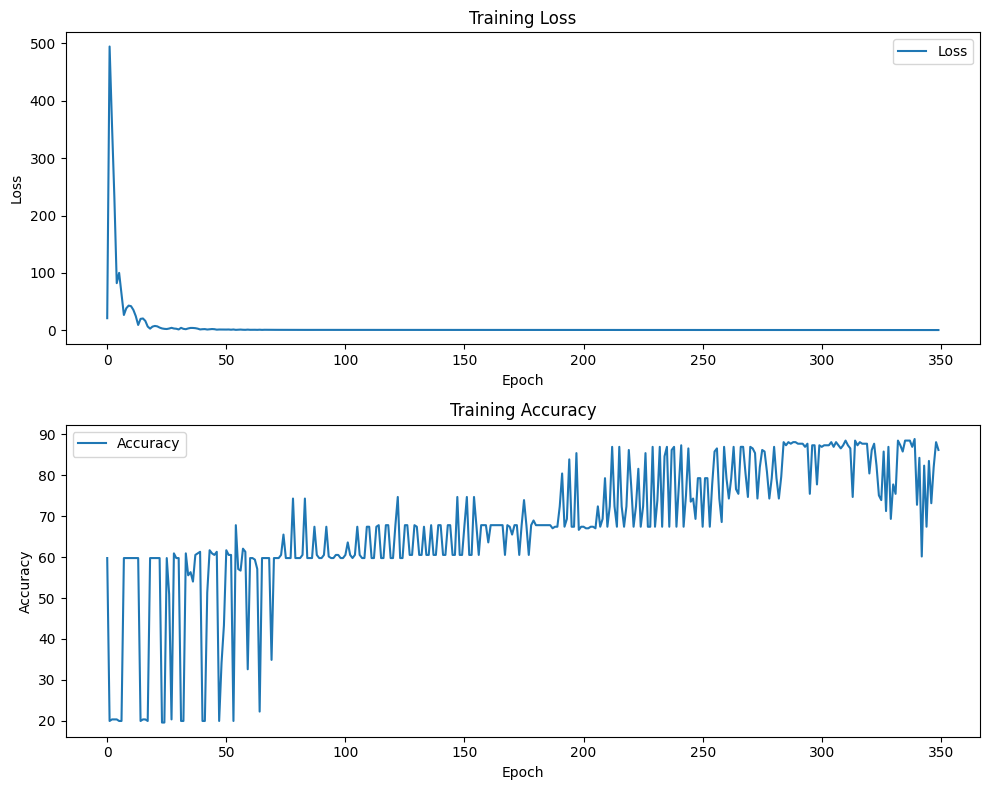

In [84]:
# Crear subplots de la loss y accuracy
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Graficar la pérdida
ax1.plot(losses, label='Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss')
ax1.legend()

# Graficar la precisión
ax2.plot(accuracies, label='Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training Accuracy')
ax2.legend()

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

##Test Set

Text(0.5, 1.0, 'Predictions on Test Set')

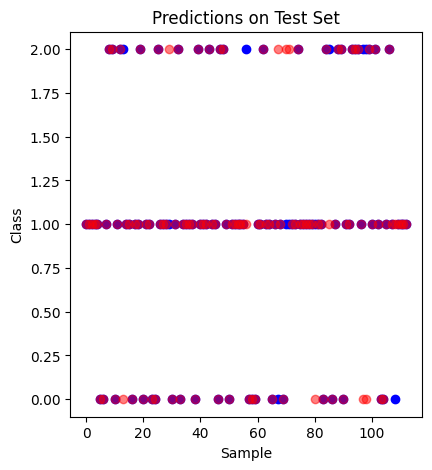

In [85]:
# Realizar predicciones en el conjunto de prueba
X_test_pred = ANNclassify(X_test_tensor)
predicted_labels = torch.argmax(X_test_pred, dim=1)

# Calcular la pérdida en el conjunto de prueba
loss_test = lossfun(X_test_pred, y_test_tensor)

# Crear una gráfica para visualizar las predicciones y la pérdida
plt.figure(figsize=(10, 5))

# Gráfica de predicciones
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(predicted_labels)), predicted_labels, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Sample')
plt.ylabel('Class')
plt.title('Predictions on Test Set')

In [86]:
# Calcular la precisión en el conjunto de prueba
accuracy = (predicted_labels == y_test_tensor).float().mean().item() * 100
print("Accuracy on test set: {:.2f}%".format(accuracy))

Accuracy on test set: 90.27%


##Con una clase

In [47]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

class ModelTrainer:
    def __init__(self, model, loss_function, optimizer):
        self.model = model
        self.loss_function = loss_function
        self.optimizer = optimizer
        self.losses = []
        self.accuracies = []

    def train(self, X_train_tensor, y_train_tensor, num_epochs):
        for epoch in range(num_epochs):
            # Forward pass
            outputs = self.model(X_train_tensor)
            loss = self.loss_function(outputs, y_train_tensor)

            # Calculate accuracy
            predicted_labels = torch.argmax(outputs, dim=1)
            accuracy = 100 * (predicted_labels == y_train_tensor).float().mean()

            # Backward pass and optimization
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            # Store loss and accuracy values
            self.losses.append(loss.item())
            self.accuracies.append(accuracy)

            # Print training loss and accuracy
            if (epoch + 1) % 10 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%")

            # Check if desired loss is reached
            if target_loss is not None and loss.item() <= target_loss:
                print(f"Desired loss of {target_loss} reached. Stopping training.")
                break

            # Check if desired accuracy is reached
            if target_accuracy is not None and accuracy.item() >= target_accuracy:
                print(f"Desired accuracy of {target_accuracy}% reached. Stopping training.")
                break



    def plot_loss_accuracy(self):
        plt.figure(figsize=(10, 4))

        # Plot loss
        plt.subplot(1, 2, 1)
        plt.plot(self.losses)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training Loss')

        # Plot accuracy
        plt.subplot(1, 2, 2)
        plt.plot(self.accuracies)
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.title('Training Accuracy')

        plt.tight_layout()
        plt.show()

In [59]:
X_testANN = pd.read_pickle('./X_test_ANN.pkl')
y_testANN = pd.read_pickle('./y_test_ANN.pkl')
with open(f"./modelANN.pkl", "rb") as archivo:
    model  = pickle.load(archivo)

Epoch [10/3000], Loss: 39.2449, Accuracy: 19.54%
Epoch [20/3000], Loss: 16.6278, Accuracy: 58.62%
Epoch [30/3000], Loss: 13.2442, Accuracy: 60.92%
Epoch [40/3000], Loss: 35.7196, Accuracy: 58.62%
Epoch [50/3000], Loss: 64.5006, Accuracy: 21.84%
Epoch [60/3000], Loss: 26.6919, Accuracy: 19.54%
Epoch [70/3000], Loss: 18.7640, Accuracy: 58.62%
Epoch [80/3000], Loss: 26.6815, Accuracy: 58.62%
Epoch [90/3000], Loss: 16.7094, Accuracy: 58.62%
Epoch [100/3000], Loss: 4.0803, Accuracy: 61.30%
Epoch [110/3000], Loss: 8.3970, Accuracy: 59.77%
Epoch [120/3000], Loss: 4.4680, Accuracy: 60.92%
Epoch [130/3000], Loss: 3.0594, Accuracy: 57.47%
Epoch [140/3000], Loss: 1.6443, Accuracy: 60.54%
Epoch [150/3000], Loss: 6.0082, Accuracy: 20.69%
Epoch [160/3000], Loss: 2.8972, Accuracy: 60.54%
Epoch [170/3000], Loss: 1.9996, Accuracy: 65.13%
Epoch [180/3000], Loss: 3.5743, Accuracy: 59.77%
Epoch [190/3000], Loss: 0.6448, Accuracy: 90.42%
Desired accuracy of 90.0% reached. Stopping training.


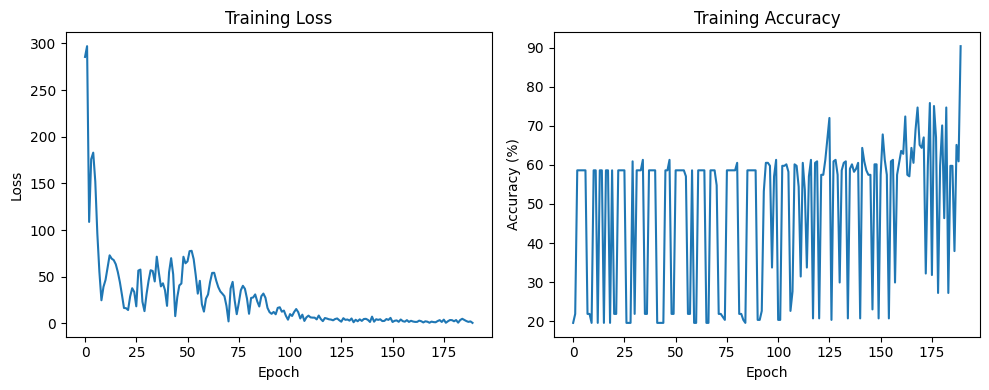

In [70]:
input_size = 25
hidden_size = 64
output_size = 3
target_accuracy = 90.0  # Precisión objetivo
target_loss = 0.5       # Pérdida objetivo
model = NeuralNetwork(input_size, hidden_size, output_size)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Crear el objeto ModelTrainer y entrenar el modelo
trainer = ModelTrainer(model, loss_function, optimizer)
trainer.train(X_train_tensor, y_train_tensor, num_epochs = 3000)

# Visualizar las gráficas de pérdida y precisión
trainer.plot_loss_accuracy()

##Ahora probaremos el modelo preentrenado con nuestro test en el plot el Rojo predichos Azul correctos

In [67]:
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Realizar predicciones en el conjunto de prueba
X_test_pred = model(X_test_tensor)
predicted_labels = torch.argmax(X_test_pred, dim=1)

Text(0.5, 1.0, 'Predictions on Test Set')

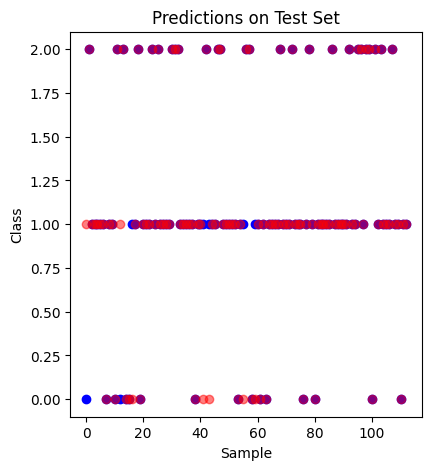

In [68]:
# Realizar predicciones en el conjunto de prueba
X_test_pred = model(X_test_tensor)
predicted_labels = torch.argmax(X_test_pred, dim=1)

# Calcular la pérdida en el conjunto de prueba
loss_test = loss_function(X_test_pred, y_test_tensor)
# Crear una gráfica para visualizar las predicciones y la pérdida
plt.figure(figsize=(10, 5))

# Gráfica de predicciones
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test_tensor)), y_test_tensor, color='blue', label='Actual')
plt.scatter(range(len(predicted_labels)), predicted_labels, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Sample')
plt.ylabel('Class')
plt.title('Predictions on Test Set')

In [69]:
# Calcular la precisión en el conjunto de prueba
accuracy = (predicted_labels == y_test_tensor).float().mean().item() * 100
print("Accuracy on test set: {:.2f}%".format(accuracy))

Accuracy on test set: 93.81%
